In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.dropna(axis=1,inplace=True)

In [5]:
df.columns = ['label','text']

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

In [10]:
def clean_text(text):
    text = text.lower()
    text = remove_punctuation(text,regular_punct)
    text = ' '.join(text.split())
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('\n','',text)
    return text

In [11]:
df['clean_text'] = df['text'].apply(clean_text)

In [12]:
df['clean_text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: clean_text, Length: 5572, dtype: object

In [13]:
df.iloc[0]['clean_text']

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [14]:
df

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...


In [15]:
nltk.download('stopwords')
stop_words = stopwords.words('english') + ['u','im','c','gt','lt','get']

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['clean_text'] = df['clean_text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kemals\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [16]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['tokenized'] = df['clean_text'].apply(lambda x: tokenize(x))

In [17]:
df

,label,text,clean_text,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,"[dun, say, early, hor, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact å£750 pound prize 2 c...,"[2nd, time, tried, 2, contact, å£750, pound, p..."
5568,ham,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,"[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,"[guy, bitching, acted, like, interested, buyin..."


In [18]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
w_lemmatizer = WordNetLemmatizer()
def lemmatizer(tokens):
    words_and_tags = nltk.pos_tag(tokens)
    return [w_lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [20]:
df['lemmatized'] = df['tokenized'].apply(lambda x: lemmatizer(x))

In [21]:
df.tail()

,label,text,clean_text,tokenized,lemmatized
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact å£750 pound prize 2 c...,"[2nd, time, tried, 2, contact, å£750, pound, p...","[2nd, time, try, 2, contact, å£750, pound, pri..."
5568,ham,Will Ì_ b going to esplanade fr home?,ì b going esplanade fr home,"[ì, b, going, esplanade, fr, home]","[ì, b, go, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions,"[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,"[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interested, buying, so..."
5571,ham,Rofl. Its true to its name,rofl true name,"[rofl, true, name]","[rofl, true, name]"


In [22]:
df.drop(columns=['text'],axis=1,inplace=True)

In [23]:
df['non-tokenized'] = df['lemmatized'].apply(lambda x: ' '.join(str(item) for item in x))

In [24]:
all_text = ' '.join(word for word in df['non-tokenized'])

In [25]:
from collections import Counter
splitted = all_text.split()
Counter = Counter(splitted)

most_occur = Counter.most_common(10)
print(most_occur)

[('call', 672), ('go', 558), ('2', 515), ('ur', 385), ('come', 327), ('4', 317), ('get', 311), ('ok', 292), ('free', 284), ('know', 283)]


In [26]:
#!pip install wordcloud
from wordcloud import WordCloud

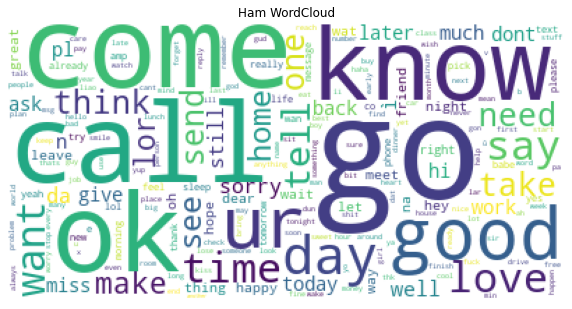

In [27]:
wc = WordCloud(background_color='white',max_words=200,collocations = False)
wc.generate(' '.join(word for word in df.loc[df['label'] == 'ham' , 'non-tokenized']))
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.title('Ham WordCloud')
plt.axis('off')
plt.show()

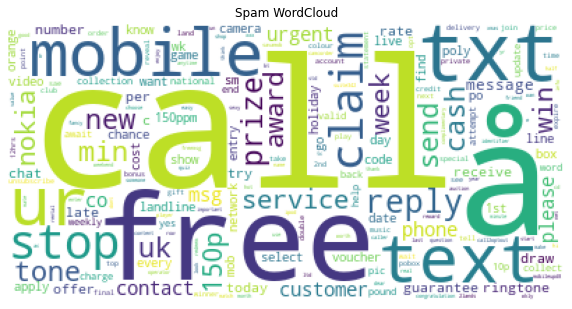

In [28]:
wc = WordCloud(background_color='white',max_words=200,collocations = False)
wc.generate(' '.join(word for word in df.loc[df['label'] == 'spam' , 'non-tokenized']))
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.title('Spam WordCloud')
plt.axis('off')
plt.show()

In [65]:
inputs = df['non-tokenized']
labels = df['label']

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(4457,)

In [67]:
X_test.shape

(1115,)

In [74]:
vectorizer = TfidfVectorizer(decode_error='ignore')
trainX = vectorizer.fit_transform(X_train)
testX = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(trainX, y_train)
print(model.score(testX, y_test))

0.9659192825112107


In [75]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn import svm
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:

def modelEvaluate(xtest,ytest,model):
    
    # Prediction for Test and Train Dataset
    test_pred=model.predict(xtest)
    test_pred_proba = model.predict_proba(xtest)[::,1]
    
    # Making Confusion Matrix and calculating accuracy score
    pr_score = metrics.precision_score(ytest, test_pred,pos_label="ham")
    rc_score = metrics.recall_score(ytest, test_pred,pos_label="ham")
    ac_score = metrics.accuracy_score(ytest, test_pred)
    f1_skor = metrics.f1_score(ytest, test_pred,pos_label="ham")
    auc = metrics.roc_auc_score(ytest, test_pred_proba)
    print("For Testing Dataset")
    print("===============================")
    print(f'Accuracy: {ac_score:.2f}, Precision: {pr_score:.2f}, Recall: {rc_score:.2f}, AUC Score: {auc:.2f}')
    print("===============================")
    print(classification_report(ytest,test_pred))
    metrics.plot_confusion_matrix(model,xtest,ytest,cmap='GnBu')

For Testing Dataset
Accuracy: 0.97, Precision: 0.96, Recall: 1.00, AUC Score: 0.98
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



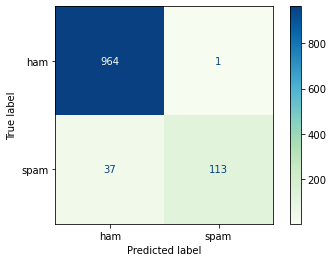

In [77]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(trainX, y_train)
modelEvaluate(testX,y_test,naive_bayes_model)

For Testing Dataset
Accuracy: 0.91, Precision: 0.91, Recall: 1.00, AUC Score: 0.83
              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       965
        spam       1.00      0.34      0.51       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg       0.92      0.91      0.89      1115



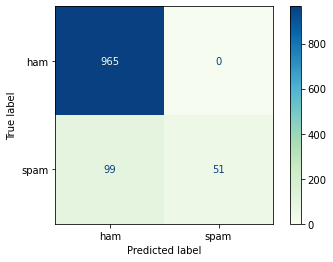

In [78]:
knn_model = KNeighborsClassifier()
knn_model.fit(trainX, y_train)
modelEvaluate(testX,y_test,knn_model)

For Testing Dataset
Accuracy: 0.98, Precision: 0.97, Recall: 1.00, AUC Score: 0.99
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



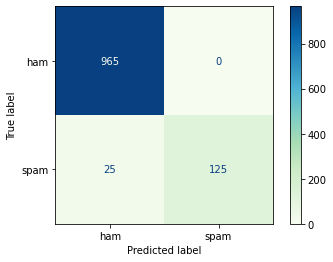

In [79]:
r_model = RandomForestClassifier()
r_model.fit(trainX, y_train)
modelEvaluate(testX,y_test,r_model)